In [2]:
# for manipulating the PDF
import fitz

# for OCR using PyTesseract
import cv2                              # pre-processing images
import pytesseract                      # extracting text from images
import numpy as np
import matplotlib.pyplot as plt         # displaying output images

from PIL import Image

In [8]:
original_image = cv2.imread('./images/page-52.png')

In [9]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

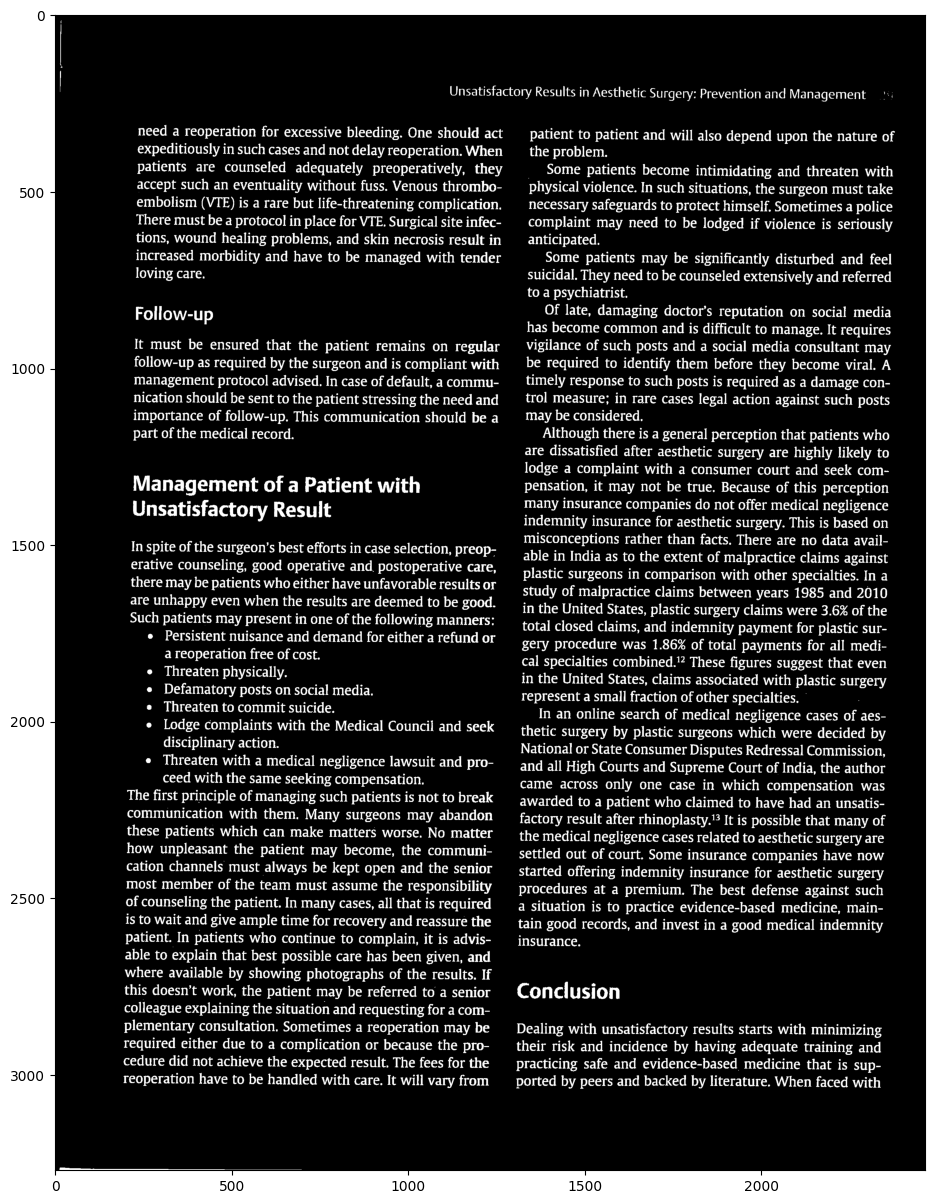

In [10]:
# Performing OTSU threshold
ret, threshold_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
plt.figure(figsize=(25, 15))
plt.imshow(threshold_image, cmap='gray')
plt.show()

In [12]:
def reverse_tuple(t):
  #condition checking 
    if len(t) == 0:
        return t
    else:
        return(t[-1],)+reverse_tuple(t[:-1])

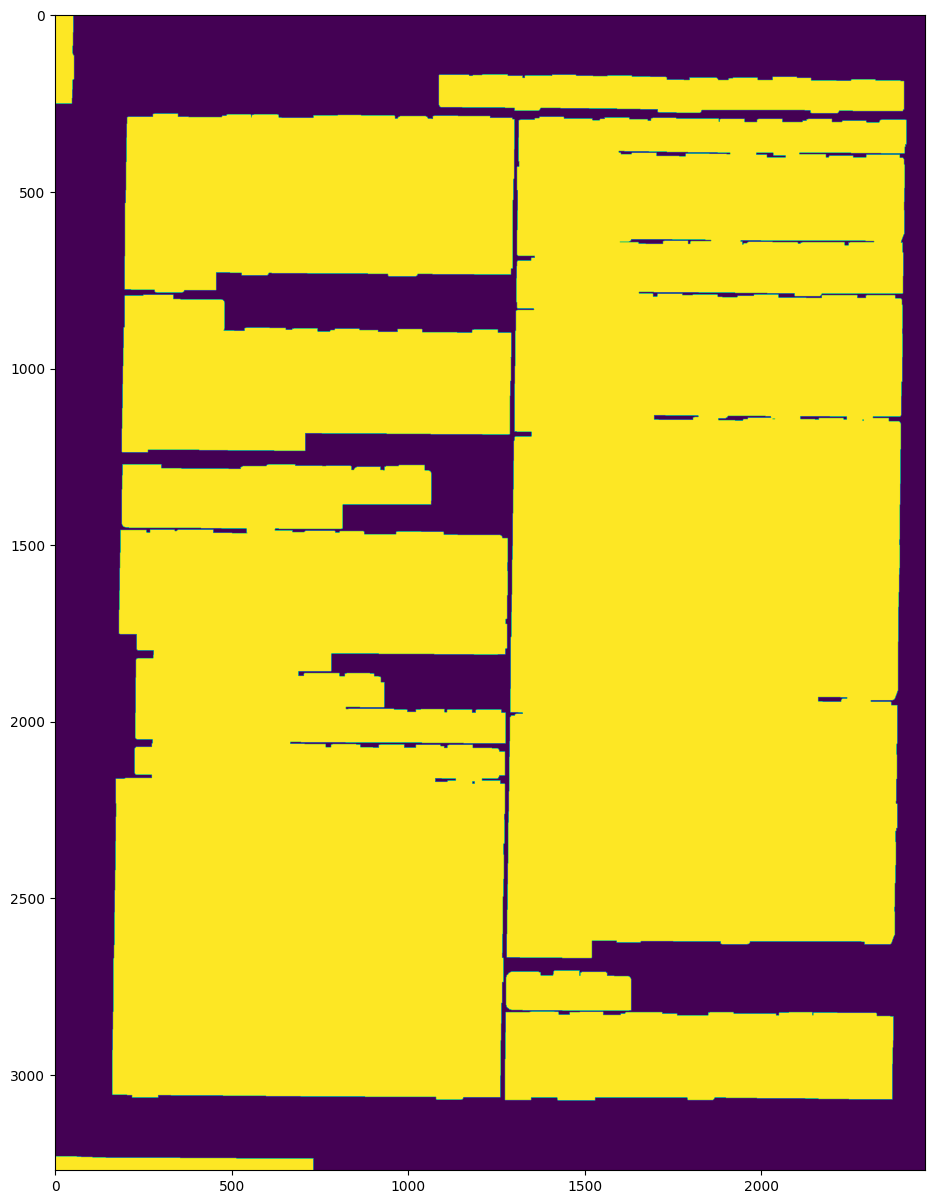


Unsatisfactory Results in Aesthetic Surgery: Prevention and Management 29

need a reoperation for excessive bleeding. One should act
expeditiously in such cases and not delay reoperation. When
patients are counseled adequately preoperatively, they
accept such an eventuality without fuss. Venous thrombo-
embolism (VTE) is a rare but life-threatening complication.
There must be a protocol in place for VTE. Surgical site infec-
tions, wound healing problems, and skin necrosis result in
increased morbidity and have to be managed with tender
loving care.











patient to patient and will also depend upon the nature of
the problem.

Some patients become intimidating and threaten with
physical violence. In such situations, the surgeon must take
necessary safeguards to protect himself. Sometimes a police
complaint may need to be lodged if violence is seriously
anticipated.

Some patients may be significantly disturbed and feel
suicidal. They need to be counseled extensively and referred


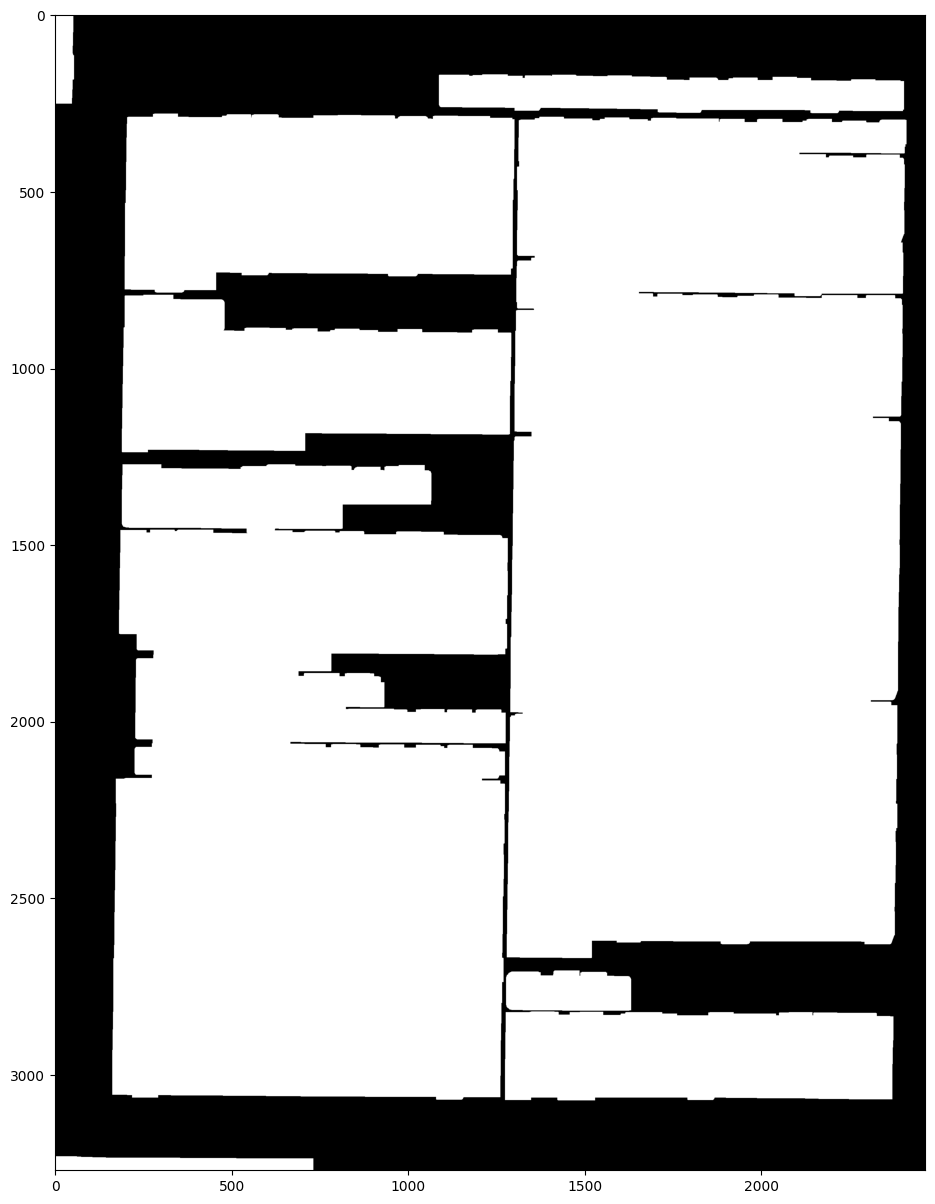

In [13]:
rectangular_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (66, 66))

# Applying dilation on the threshold image
dilated_image = cv2.dilate(threshold_image, rectangular_kernel, iterations = 1)
plt.figure(figsize=(25, 15))
plt.imshow(dilated_image)
plt.show()

# Finding contours
contours, hierarchy = cv2.findContours(dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours = reverse_tuple(contours)

# Creating a copy of the image
copied_image = original_image.copy()

with open("./txt.txt", "w+") as f:
    f.write("")
f.close()

mask = np.zeros(original_image.shape, np.uint8)
 
# Looping through the identified contours
# Then rectangular part is cropped and passed on to pytesseract
# pytesseract extracts the text inside each contours
# Extracted text is then written into a text file
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
     
    # Cropping the text block for giving input to OCR
    cropped = copied_image[y:y + h, x:x + w]
    
    with open("./txt.txt", "a") as f:
        # Apply OCR on the cropped image
        text = pytesseract.image_to_string(cropped, lang='eng', config='--oem 3 --psm 1')
        print(text)
        
    masked = cv2.drawContours(mask, [cnt], 0, (255, 255, 255), -1)

plt.figure(figsize=(25, 15))
plt.imshow(masked, cmap='gray')
plt.show()